# General (Non-Price) Trends

Trend in context length overall 
Trends in context length for models in price range 
Trend in conetxt length for models in ability range


In [1]:
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
#I want to plot output price vs release date
import matplotlib.pyplot as plt

#read in csv file and convert to pandas dataframe
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression, QuantileRegressor



Index(['Model', 'Creator', 'License', 'Context\nWindow',
       'Artificial Analysis\nIntelligence Index',
       'MMLU-Pro (Reasoning & Knowledge)',
       'GPQA Diamond (Scientific Reasoning)',
       'Humanity's Last Exam (Reasoning & Knowledge)',
       'LiveCodeBench (Coding)', 'SciCode (Coding)', 'HumanEval (Coding)',
       'MATH-500 (Quantitative Reasoning)', 'AIME 2024 (Competition Math)',
       'Multilingual Index (Artificial Analysis)', 'Chatbot Arena',
       'Blended\nUSD/1M Tokens', 'Input Price\nUSD/1M Tokens',
       'Output Price\nUSD/1M Tokens', 'Median\nTokens/s', 'P5\nTokens/s',
       'P25\nTokens/s', 'P75\nTokens/s', 'P95\nTokens/s',
       'Median\nFirst Chunk (s)', 'First Answer\nToken (s)',
       'P5\nFirst Chunk (s)', 'P25\nFirst Chunk (s)', 'P75\nFirst Chunk (s)',
       'P95\nFirst Chunk (s)', 'Total\nResponse (s)', 'Reasoning\nTime (s)',
       'Further\nAnalysis', 'Release Date', 'Parameters',
       'Known Active Parameters', 'Lowest Output Price Found 

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_64087/3286527902.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


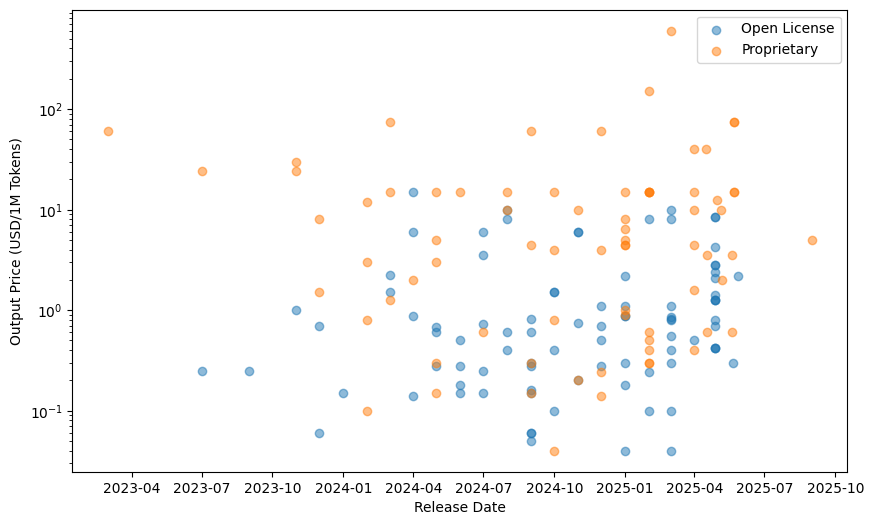

In [3]:

df = pd.read_csv('art_analysis_inf_data.csv')

#print the first 5 rows of the dataframe
# print(df.head())
print(df.columns)

# Convert 'release_date' to datetime if it's not already
#filter out nan values  

#filter based on 
df = df[df['Output Price\nUSD/1M Tokens'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert price to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Output Price\nUSD/1M Tokens'].dtype == 'object':
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Output Price\nUSD/1M Tokens'], alpha=0.5, label='Proprietary')
plt.xlabel('Release Date')
plt.ylabel('Output Price (USD/1M Tokens)')
plt.yscale('log')
plt.legend()
# Plot output price vs release date
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Date'], df['Output Price\nUSD/1M Tokens'], alpha=0.5)
# plt.xlabel('Release Date')


# plt.ylabel('Output Price (USD/1M Tokens)')

# Trends in Context Length Over Time

                         Model   Creator License Context\nWindow  \
0   DeepSeek R1 0528 (May '25)  DeepSeek    Open            128k   
1                     Devstral   Mistral    Open            256k   
2        Qwen3 32B (Reasoning)   Alibaba    Open            128k   
3    Qwen3 30B A3B (Reasoning)   Alibaba    Open            128k   
4  Qwen3 235B A22B (Reasoning)   Alibaba    Open            128k   

   Artificial Analysis\nIntelligence Index MMLU-Pro (Reasoning & Knowledge)  \
0                                      NaN                           84.90%   
1                                      NaN                           63.20%   
2                                      NaN                           79.80%   
3                                      NaN                           77.70%   
4                                      NaN                           82.80%   

  GPQA Diamond (Scientific Reasoning)  \
0                              81.30%   
1                              43.

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_64087/2575743732.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


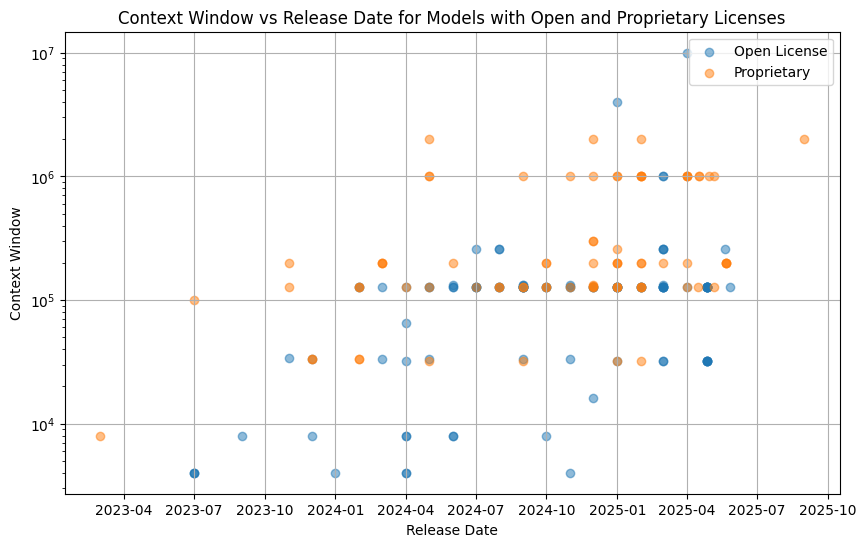

In [5]:
df = pd.read_csv('art_analysis_inf_data.csv')

#print the first 5 rows of the dataframe
print(df.head())
df.columns

# Convert 'release_date' to datetime if it's not already
#filter out nan values  

#filter based on 
df = df[df['Context\nWindow'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert context window to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Context\nWindow'].dtype == 'object':
    # Replace 'k' and 'm' suffixes with their numeric equivalents
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('k', '000').str.replace('m', '000000')
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Context\nWindow'] = df['Context\nWindow'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Context\nWindow'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Context\nWindow'], alpha=0.5, label='Proprietary')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title('Context Window vs Release Date for Models with Open and Proprietary Licenses')
plt.grid(True)
plt.yscale('log')
plt.legend()

# Plot output price vs release date
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Date'], df['Output Price\nUSD/1M Tokens'], alpha=0.5)
# plt.xlabel('Release Date')
# plt.ylabel('Output Price (USD/1M Tokens)')

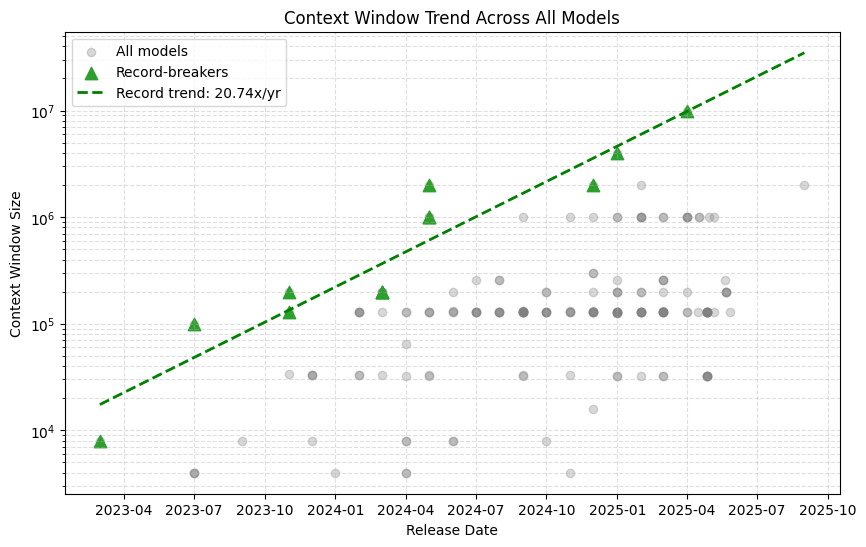

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor
from datetime import datetime

# 0) Bounds + correct key
price_min = -.1
price_max = 1e9
price_col = 'Output Price\nUSD/1M Tokens'

# 1) (Re-)convert price column to float
df[price_col] = (
    df[price_col]
      .astype(str)
      .str.replace('[$,]', '', regex=True)
)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# 2) Filter to your price range
df_price = df[
    df[price_col].between(price_min, price_max)
].copy()

# 3) Drop any rows still missing key fields
df_price = df_price[
    df_price['Context\nWindow'].notna() &
    df_price['Release Date'].notna()
]

# 4) Sort and compute ordinal dates
df_price_sorted = df_price.sort_values('Release Date').copy()
df_price_sorted['Date_Ordinal'] = (
    df_price_sorted['Release Date']
              .map(datetime.toordinal)
)

# 5) Fit overall OLS on log10(Context Window)
X_all     = df_price_sorted['Date_Ordinal'].values.reshape(-1,1)
y_all_log = np.log10(df_price_sorted['Context\nWindow'].values)
model_all = LinearRegression().fit(X_all, y_all_log)

# 5.5) Fit median (0.5) Quantile Regression on the same data
quantile = 0.9
qr = QuantileRegressor(quantile=quantile, alpha=0.0)
qr.fit(X_all, y_all_log)
y_qr_log_pred = qr.predict(np.arange(
    df_price_sorted['Date_Ordinal'].min(),
    df_price_sorted['Date_Ordinal'].max()+1
).reshape(-1,1))

# 6) Build daily grid for plotting
min_ord    = df_price_sorted['Date_Ordinal'].min()
max_ord    = df_price_sorted['Date_Ordinal'].max()
x_range    = np.arange(min_ord, max_ord+1)
x_dates    = [datetime.fromordinal(int(d)) for d in x_range]
y_pred_log = model_all.predict(x_range.reshape(-1,1))

# 7) Compute annual factor increase (overall OLS)
coef_ols       = model_all.coef_[0]
annual_factor_ols = (10**coef_ols)**365

# 7.5) Compute annual factor increase (quantile)
coef_qr        = qr.coef_[0]
annual_factor_qr  = (10**coef_qr)**365

# 8) Identify record-breakers in this subset
df_price_sorted['Is_Record'] = (
    df_price_sorted['Context\nWindow']
      .cummax() == df_price_sorted['Context\nWindow']
)
record_df = df_price_sorted[df_price_sorted['Is_Record']].copy()

# 9) Fit OLS on record-breakers
X_rec          = record_df['Date_Ordinal'].values.reshape(-1,1)
y_rec_log      = np.log10(record_df['Context\nWindow'].values)
model_rec      = LinearRegression().fit(X_rec, y_rec_log)
y_rec_log_pred = model_rec.predict(x_range.reshape(-1,1))

# 10) Compute annual factor increase (record OLS)
coef_rec       = model_rec.coef_[0]
annual_factor_rec = (10**coef_rec)**365

# 11) Plot
plt.figure(figsize=(10,6))

# a) All models in this price range
plt.scatter(
    df_price_sorted['Release Date'],
    df_price_sorted['Context\nWindow'],
    color='gray', alpha=0.3, label='All models'
)

# b) Overall OLS trend
# plt.plot(
#     x_dates,
#     10**y_pred_log,
#     'r-', lw=2,
#     label=f'OLS trend: {annual_factor_ols:.2f}x/yr'
# )

# c) Quantile trend (median)
# plt.plot(
#     x_dates,
#     10**y_qr_log_pred,
#     'b-.', lw=2,
#     label=f'{quantile*100:.0f}th-quantile trend: {annual_factor_qr:.2f}x/yr'
# )

# d) Record-breaker points
plt.scatter(
    record_df['Release Date'],
    record_df['Context\nWindow'],
    color='tab:green', s=80, marker='^',
    label='Record-breakers'
)

# e) Record-breaker OLS trend
plt.plot(
    x_dates,
    10**y_rec_log_pred,
    'g--', lw=2,
    label=f'Record trend: {annual_factor_rec:.2f}x/yr'
)

plt.yscale('log')
plt.xlabel('Release Date')
plt.ylabel('Context Window Size')
plt.title(
    f'Context Window Trend Across All Models'
)

# f'(cost ∈ [{price_min}, {price_max}] USD per 1M tokens)'
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()

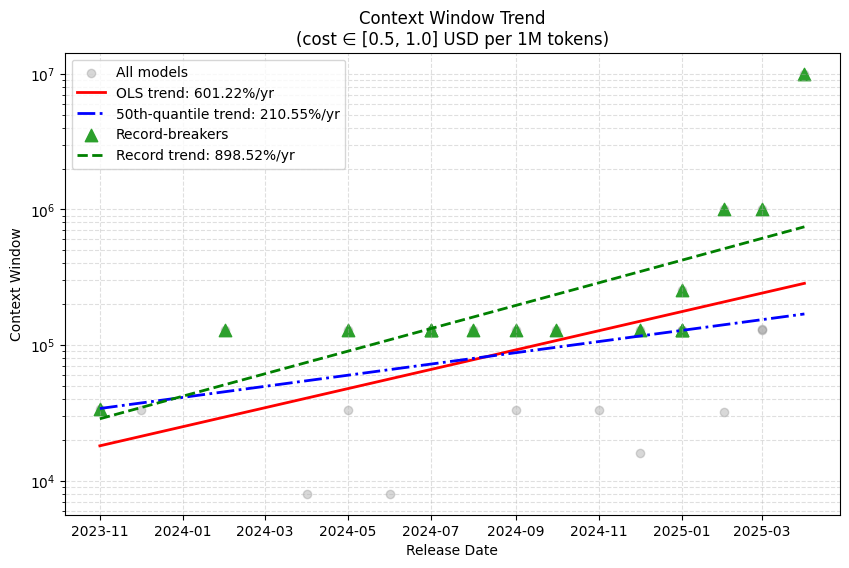

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor
from datetime import datetime

# 0) Bounds + correct key
price_min = 0.5
price_max = 1.0
price_col = 'Output Price\nUSD/1M Tokens'

# 1) (Re-)convert price column to float
df[price_col] = (
    df[price_col]
      .astype(str)
      .str.replace('[$,]', '', regex=True)
)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# 2) Filter to your price range
df_price = df[
    df[price_col].between(price_min, price_max)
].copy()

# 3) Drop any rows still missing key fields
df_price = df_price[
    df_price['Context\nWindow'].notna() &
    df_price['Release Date'].notna()
]

# 4) Sort and compute ordinal dates
df_price_sorted = df_price.sort_values('Release Date').copy()
df_price_sorted['Date_Ordinal'] = (
    df_price_sorted['Release Date']
              .map(datetime.toordinal)
)

# 5) Fit overall OLS on log10(Context Window)
X_all     = df_price_sorted['Date_Ordinal'].values.reshape(-1,1)
y_all_log = np.log10(df_price_sorted['Context\nWindow'].values)
model_all = LinearRegression().fit(X_all, y_all_log)

# 5.5) Fit median (0.5) Quantile Regression on the same data
quantile = 0.5
qr = QuantileRegressor(quantile=quantile, alpha=0.0)
qr.fit(X_all, y_all_log)
y_qr_log_pred = qr.predict(np.arange(
    df_price_sorted['Date_Ordinal'].min(),
    df_price_sorted['Date_Ordinal'].max()+1
).reshape(-1,1))

# 6) Build daily grid for plotting
min_ord    = df_price_sorted['Date_Ordinal'].min()
max_ord    = df_price_sorted['Date_Ordinal'].max()
x_range    = np.arange(min_ord, max_ord+1)
x_dates    = [datetime.fromordinal(int(d)) for d in x_range]
y_pred_log = model_all.predict(x_range.reshape(-1,1))

# 7) Compute annual % growth (overall OLS)
coef_ols       = model_all.coef_[0]
annual_pct_ols = ((10**coef_ols)**365 - 1) * 100

# 7.5) Compute annual % growth (quantile)
coef_qr        = qr.coef_[0]
annual_pct_qr  = ((10**coef_qr)**365 - 1) * 100

# 8) Identify record-breakers in this subset
df_price_sorted['Is_Record'] = (
    df_price_sorted['Context\nWindow']
      .cummax() == df_price_sorted['Context\nWindow']
)
record_df = df_price_sorted[df_price_sorted['Is_Record']].copy()

# 9) Fit OLS on record-breakers
X_rec          = record_df['Date_Ordinal'].values.reshape(-1,1)
y_rec_log      = np.log10(record_df['Context\nWindow'].values)
model_rec      = LinearRegression().fit(X_rec, y_rec_log)
y_rec_log_pred = model_rec.predict(x_range.reshape(-1,1))

# 10) Compute annual % growth (record OLS)
coef_rec       = model_rec.coef_[0]
annual_pct_rec = ((10**coef_rec)**365 - 1) * 100

# 11) Plot
plt.figure(figsize=(10,6))

# a) All models in this price range
plt.scatter(
    df_price_sorted['Release Date'],
    df_price_sorted['Context\nWindow'],
    color='gray', alpha=0.3, label='All models'
)

# b) Overall OLS trend
plt.plot(
    x_dates,
    10**y_pred_log,
    'r-', lw=2,
    label=f'OLS trend: {annual_pct_ols:.2f}%/yr'
)

# c) Quantile trend (median)
plt.plot(
    x_dates,
    10**y_qr_log_pred,
    'b-.', lw=2,
    label=f'{quantile*100:.0f}th-quantile trend: {annual_pct_qr:.2f}%/yr'
)

# d) Record-breaker points
plt.scatter(
    record_df['Release Date'],
    record_df['Context\nWindow'],
    color='tab:green', s=80, marker='^',
    label='Record-breakers'
)

# e) Record-breaker OLS trend
plt.plot(
    x_dates,
    10**y_rec_log_pred,
    'g--', lw=2,
    label=f'Record trend: {annual_pct_rec:.2f}%/yr'
)

plt.yscale('log')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title(
    f'Context Window Trend\n'
    f'(cost ∈ [{price_min}, {price_max}] USD per 1M tokens)'
)
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()

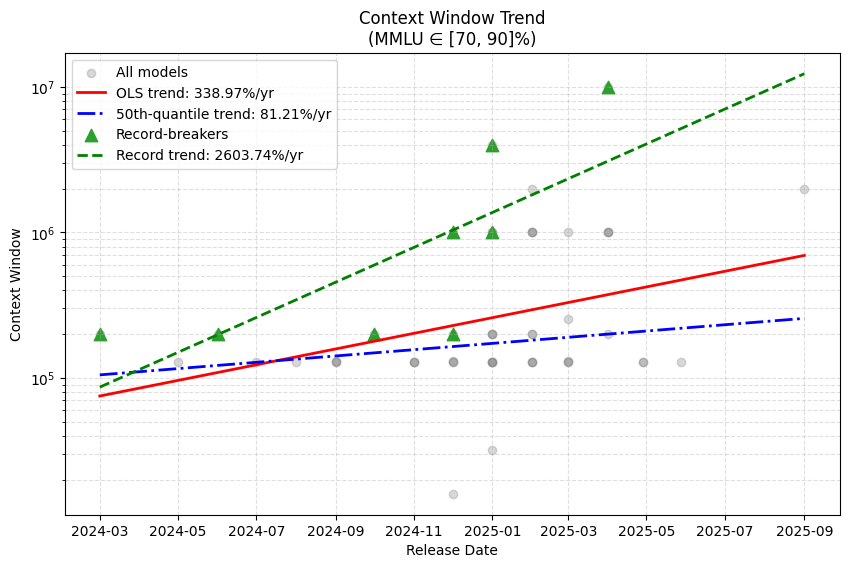

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor
from datetime import datetime
import pandas as pd

# 0) Your MMLU bounds and column name
min_mmlu = 70
max_mmlu = 90
mmlu_col = 'MMLU-Pro (Reasoning & Knowledge)'

# 1) Convert MMLU “XX%” → float
df[mmlu_col] = (
    df[mmlu_col]
      .astype(str)
      .str.replace('%', '', regex=False)
      .astype(float)
)

# 2) Filter to your MMLU range
df_mmlu = df[df[mmlu_col].between(min_mmlu, max_mmlu)].copy()

# 3) Drop any rows missing Context Window or Release Date
df_mmlu = df_mmlu[
    df_mmlu['Context\nWindow'].notna() &
    df_mmlu['Release Date'].notna()
]

# 4) Sort & compute ordinal dates
df_sorted = df_mmlu.sort_values('Release Date').copy()
df_sorted['Date_Ordinal'] = (
    df_sorted['Release Date']
             .map(datetime.toordinal)
)

# 5) Prepare data for regression
X = df_sorted['Date_Ordinal'].values.reshape(-1, 1)
y_log = np.log10(df_sorted['Context\nWindow'].values)

# 6) Fit overall OLS
ols = LinearRegression().fit(X, y_log)

# 7) Fit median Quantile Regression (τ=0.5)
quantile = 0.5
qr = QuantileRegressor(quantile=quantile, alpha=0.0)
qr.fit(X, y_log)

# 8) Build a daily grid for predictions
min_ord = df_sorted['Date_Ordinal'].min()
max_ord = df_sorted['Date_Ordinal'].max()
x_range = np.arange(min_ord, max_ord + 1)
x_dates = [datetime.fromordinal(int(d)) for d in x_range]

y_ols_log  = ols.predict(x_range.reshape(-1, 1))
y_qr_log   = qr.predict(x_range.reshape(-1, 1))

# 9) Compute annualized % growth
coef_ols = ols.coef_[0]
annual_pct_ols = ((10**coef_ols)**365 - 1) * 100

coef_qr = qr.coef_[0]
annual_pct_qr = ((10**coef_qr)**365 - 1) * 100

# 10) Identify record‐breakers and fit their OLS
df_sorted['Is_Record'] = (
    df_sorted['Context\nWindow']
             .cummax() == df_sorted['Context\nWindow']
)
record_df = df_sorted[df_sorted['Is_Record']].copy()

X_rec       = record_df['Date_Ordinal'].values.reshape(-1, 1)
y_rec_log   = np.log10(record_df['Context\nWindow'].values)
rec_ols     = LinearRegression().fit(X_rec, y_rec_log)
y_rec_log_pred = rec_ols.predict(x_range.reshape(-1, 1))
coef_rec    = rec_ols.coef_[0]
annual_pct_rec = ((10**coef_rec)**365 - 1) * 100

# 11) Plot everything
plt.figure(figsize=(10,6))

# all points
plt.scatter(
    df_sorted['Release Date'],
    df_sorted['Context\nWindow'],
    color='gray', alpha=0.3, label='All models'
)

# overall OLS
plt.plot(
    x_dates,
    10**y_ols_log,
    'r-', lw=2,
    label=f'OLS trend: {annual_pct_ols:.2f}%/yr'
)

# median quantile
plt.plot(
    x_dates,
    10**y_qr_log,
    'b-.', lw=2,
    label=f'{quantile*100:.0f}th-quantile trend: {annual_pct_qr:.2f}%/yr'
)

# record-breakers
plt.scatter(
    record_df['Release Date'],
    record_df['Context\nWindow'],
    color='tab:green', s=80, marker='^',
    label='Record-breakers'
)

# record OLS
plt.plot(
    x_dates,
    10**y_rec_log_pred,
    'g--', lw=2,
    label=f'Record trend: {annual_pct_rec:.2f}%/yr'
)

plt.yscale('log')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title(
    f'Context Window Trend\n'
    f'(MMLU ∈ [{min_mmlu}, {max_mmlu}]%)'
)
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()

# Trend in Context Length Holding Parameters Constant

# Context Length at Fixed Costs

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_31931/3604496221.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


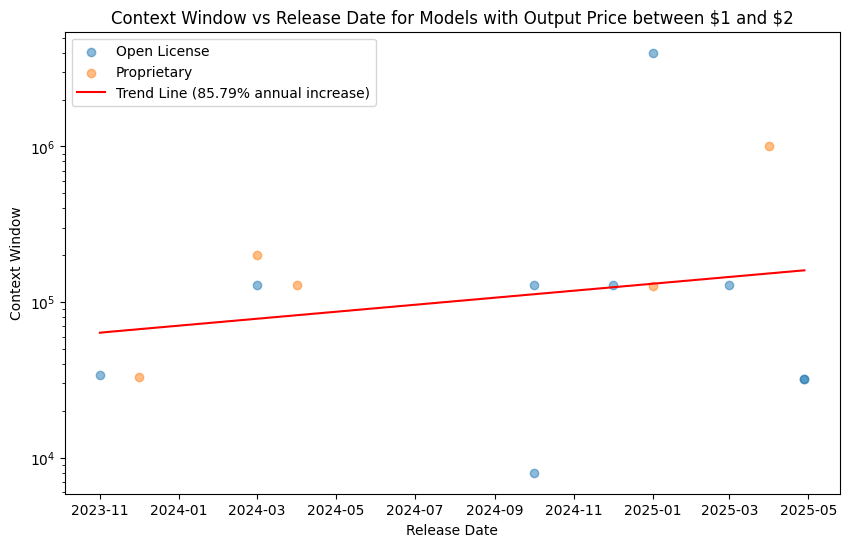

In [6]:
df = pd.read_csv('art_analysis_scrape.csv')
mincost = 1
maxcost = 2
df = df[df['Context\nWindow'].notna()]
df = df[df['Release Date'].notna()]
df['Release Date'] = pd.to_datetime(df['Release Date'])

#filter based on cost

df = df[df['Output Price\nUSD/1M Tokens'].notna()]
#convert$ to float
df['Output Price\nUSD/1M Tokens'] = df['Output Price\nUSD/1M Tokens'].str.replace('$', '').astype(float)
df = df[df['Output Price\nUSD/1M Tokens'] >= mincost]
df = df[df['Output Price\nUSD/1M Tokens'] <= maxcost]

# Convert context window to float - handle the case where it might not be a string
# First check if the column contains strings
if df['Context\nWindow'].dtype == 'object':
    # Replace 'k' and 'm' suffixes with their numeric equivalents
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('k', '000').str.replace('m', '000000')
    df['Context\nWindow'] = df['Context\nWindow'].str.replace('$', '').astype(float)
else:
    # If it's already numeric, just ensure it's float type
    df['Context\nWindow'] = df['Context\nWindow'].astype(float)

#collect output price for models with open licenses
open_license_df = df[df['License'] == 'Open']
proprietary_df = df[df['License'] == 'Proprietary']

# Convert dates to numeric for regression
df['Date_Numeric'] = pd.to_datetime(df['Release Date']).map(datetime.toordinal)

# Prepare data for regression (using log of context window)
X = df['Date_Numeric'].values.reshape(-1, 1)
y = np.log10(df['Context\nWindow'].values)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Generate points for the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Convert back to datetime for plotting
x_dates = [datetime.fromordinal(int(x[0])) for x in x_range]

# Calculate percent increase per day
daily_percent_increase = (10**(model.coef_[0]) - 1) * 100
# Calculate annual percent increase (compounded daily)
annual_percent_increase = ((10**(model.coef_[0]))**365 - 1) * 100

#plot output price for open and proprietary models
plt.figure(figsize=(10, 6))
plt.scatter(open_license_df['Release Date'], open_license_df['Context\nWindow'], alpha=0.5, label='Open License')
plt.scatter(proprietary_df['Release Date'], proprietary_df['Context\nWindow'], alpha=0.5, label='Proprietary')
# Plot the regression line
plt.plot(x_dates, 10**y_pred, 'r-', label=f'Trend Line ({annual_percent_increase:.2f}% annual increase)')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title(f'Context Window vs Release Date for Models with Output Price between \${mincost} and \${maxcost}')
plt.yscale('log')
plt.legend()




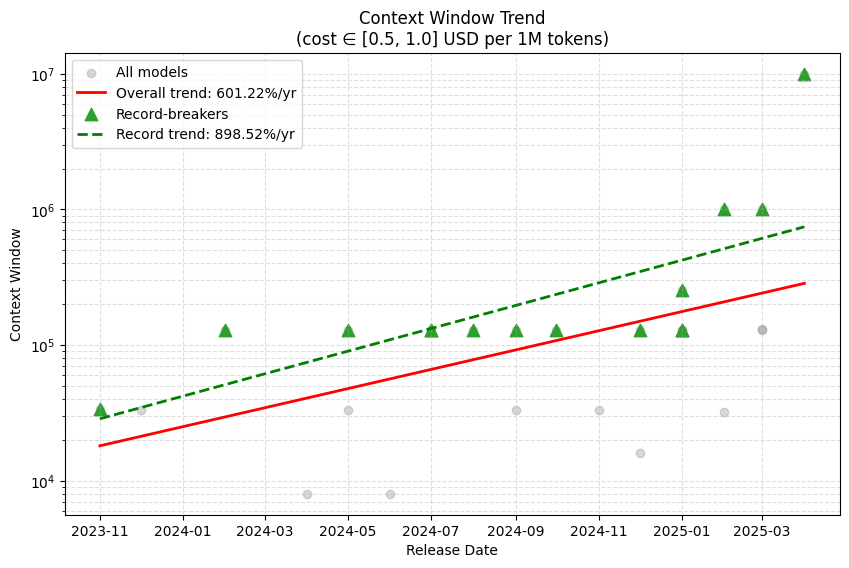

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# 0) Bounds + correct key
price_min = 0.5
price_max = 1.0
price_col = 'Output Price\nUSD/1M Tokens'

# 1) (Re-)convert price column to float
df[price_col] = (
    df[price_col]
      .astype(str)
      .str.replace('[$,]', '', regex=True)
)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# 2) Filter to your price range
df_price = df[
    df[price_col].between(price_min, price_max)
].copy()

# 3) Drop any rows still missing key fields
df_price = df_price[
    df_price['Context\nWindow'].notna() &
    df_price['Release Date'].notna()
]

# 4) Sort and compute ordinal dates
df_price_sorted = df_price.sort_values('Release Date').copy()
df_price_sorted['Date_Ordinal'] = (
    df_price_sorted['Release Date']
              .map(datetime.toordinal)
)

# 5) Fit overall OLS on log10(Context Window)
X_all     = df_price_sorted['Date_Ordinal'].values.reshape(-1,1)
y_all_log = np.log10(df_price_sorted['Context\nWindow'].values)
model_all = LinearRegression().fit(X_all, y_all_log)

# 6) Build daily grid for plotting
min_ord    = df_price_sorted['Date_Ordinal'].min()
max_ord    = df_price_sorted['Date_Ordinal'].max()
x_range    = np.arange(min_ord, max_ord+1)
x_dates    = [datetime.fromordinal(int(d)) for d in x_range]
y_pred_log = model_all.predict(x_range.reshape(-1,1))

# 7) Compute annual % growth (overall)
coef_ols      = model_all.coef_[0]
annual_pct_ols = ((10**coef_ols)**365 - 1) * 100

# 8) Identify record-breakers in this subset
df_price_sorted['Is_Record'] = (
    df_price_sorted['Context\nWindow']
      .cummax() == df_price_sorted['Context\nWindow']
)
record_df = df_price_sorted[df_price_sorted['Is_Record']].copy()

# 9) Fit OLS on record-breakers
X_rec          = record_df['Date_Ordinal'].values.reshape(-1,1)
y_rec_log      = np.log10(record_df['Context\nWindow'].values)
model_rec      = LinearRegression().fit(X_rec, y_rec_log)
y_rec_log_pred = model_rec.predict(x_range.reshape(-1,1))

# 10) Compute annual % growth (record)
coef_rec       = model_rec.coef_[0]
annual_pct_rec = ((10**coef_rec)**365 - 1) * 100

# 11) Plot
plt.figure(figsize=(10,6))
plt.scatter(
    df_price_sorted['Release Date'],
    df_price_sorted['Context\nWindow'],
    color='gray', alpha=0.3, label='All models'
)
plt.plot(
    x_dates,
    10**y_pred_log,
    'r-', lw=2,
    label=f'Overall trend: {annual_pct_ols:.2f}%/yr'
)
plt.scatter(
    record_df['Release Date'],
    record_df['Context\nWindow'],
    color='tab:green', s=80, marker='^',
    label='Record-breakers'
)
plt.plot(
    x_dates,
    10**y_rec_log_pred,
    'g--', lw=2,
    label=f'Record trend: {annual_pct_rec:.2f}%/yr'
)
plt.yscale('log')
plt.xlabel('Release Date')
plt.ylabel('Context Window')
plt.title(
    f'Context Window Trend\n'
    f'(cost ∈ [{price_min}, {price_max}] USD per 1M tokens)'
)
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()